# Estimation directe directe de la DFE - Sauts de taux de croissance  <a class="tocSkip">

Nous voulons observer directement les variations des taux de croissance dues aux effets combinés des mutations et de la stochasticité des mesures, et si possible corriger cette dernière afin d'obtenir une estimation directe de la DFE.

In [1]:
library("gridExtra")
library("ggplot2")

In [2]:
microMA_WT_growthRates_RMdead_NAab <- read.csv2("Donnees_article_modifiees/data_microMA/dataset_microMA_WT_growthRates_RMdead_NAab.csv", row.names = 1)
microMA_MutH_growthRates_RMdead_NAab <- read.csv2("Donnees_article_modifiees/data_microMA/dataset_microMA_MutH_growthRates_RMdead_NAab.csv", row.names = 1)
microMA_MutT_growthRates_RMdead_NAab <- read.csv2("Donnees_article_modifiees/data_microMA/dataset_microMA_MutT_growthRates_RMdead_NAab.csv", row.names = 1)
microMA_MF1_growthRates_RMdead_NAab <- read.csv2("Donnees_article_modifiees/data_microMA/dataset_microMA_MF1_growthRates_RMdead_NAab.csv", row.names = 1)

In [3]:
dim(microMA_MutH_growthRates_RMdead_NAab)
head(microMA_MutH_growthRates_RMdead_NAab)

[1] 660 826

,growth.rate,growth.rate.1,growth.rate.2,growth.rate.3,growth.rate.4,growth.rate.5,growth.rate.6,growth.rate.10,growth.rate.12,growth.rate.14,⋯,growth.rate.1453,growth.rate.1454,growth.rate.1456,growth.rate.1457,growth.rate.1459,growth.rate.1463,growth.rate.1464,growth.rate.1465,growth.rate.1466,growth.rate.1474
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3,0.03526965,0.03202591,0.02811950,0.02976484,NA,NA,0.03168793,0.03343492,NA,0.03377725,⋯,0.03168793,0.03237246,NA,NA,0.02600744,0.0320605,0.02177358,0.03774099,0.03587815,NA
4,0.03526965,0.03202591,0.02811950,0.02976484,0.03381196,0.03075045,0.03168793,0.03343492,0.03373995,0.03377725,⋯,0.03168793,0.03237246,NA,NA,0.02600744,0.0320605,0.02177358,0.03774099,0.03587815,NA
5,0.03247045,0.03202591,0.02680181,0.03056693,0.03381196,0.03075045,0.02882748,0.03343492,0.03373995,0.03377725,⋯,0.02639111,0.03237246,NA,0.03095447,0.02600744,0.0320605,0.02177358,0.03774099,0.03587815,0.03087609
6,0.03247045,0.03202591,0.02680181,0.03056693,0.03381196,0.03075045,0.02882748,0.02997074,0.03373995,0.03377725,⋯,0.02639111,0.03237246,0.03667211,0.03095447,0.02600744,0.0320605,0.02177358,0.03774099,0.03587815,0.03087609
7,0.03247045,0.03367152,0.02680181,0.03056693,0.03381196,0.03075045,0.02882748,0.02997074,0.02875688,0.02766174,⋯,0.02639111,0.03237246,0.03667211,0.03095447,0.02600744,0.0320605,0.03045276,0.03774099,0.03587815,0.03087609
8,0.03247045,0.03367152,0.02680181,0.03056693,0.03219097,0.03075045,0.02882748,0.02997074,0.02875688,0.02766174,⋯,0.02639111,0.02786493,0.03667211,0.03095447,0.02600744,0.0320605,0.03045276,NA,0.02884166,0.03087609


# Sauts bruts : W-W'

Commençons par les variations brutes du taux de croissance dans tous les canaux, en supprimant les mesures constantes correspondant aux taux de croissance moyennés sur une génération ou aux cellules mortes.


	Shapiro-Wilk normality test

data:  drops_MutH_norm[1:5000]
W = 0.99867, p-value = 0.0003797


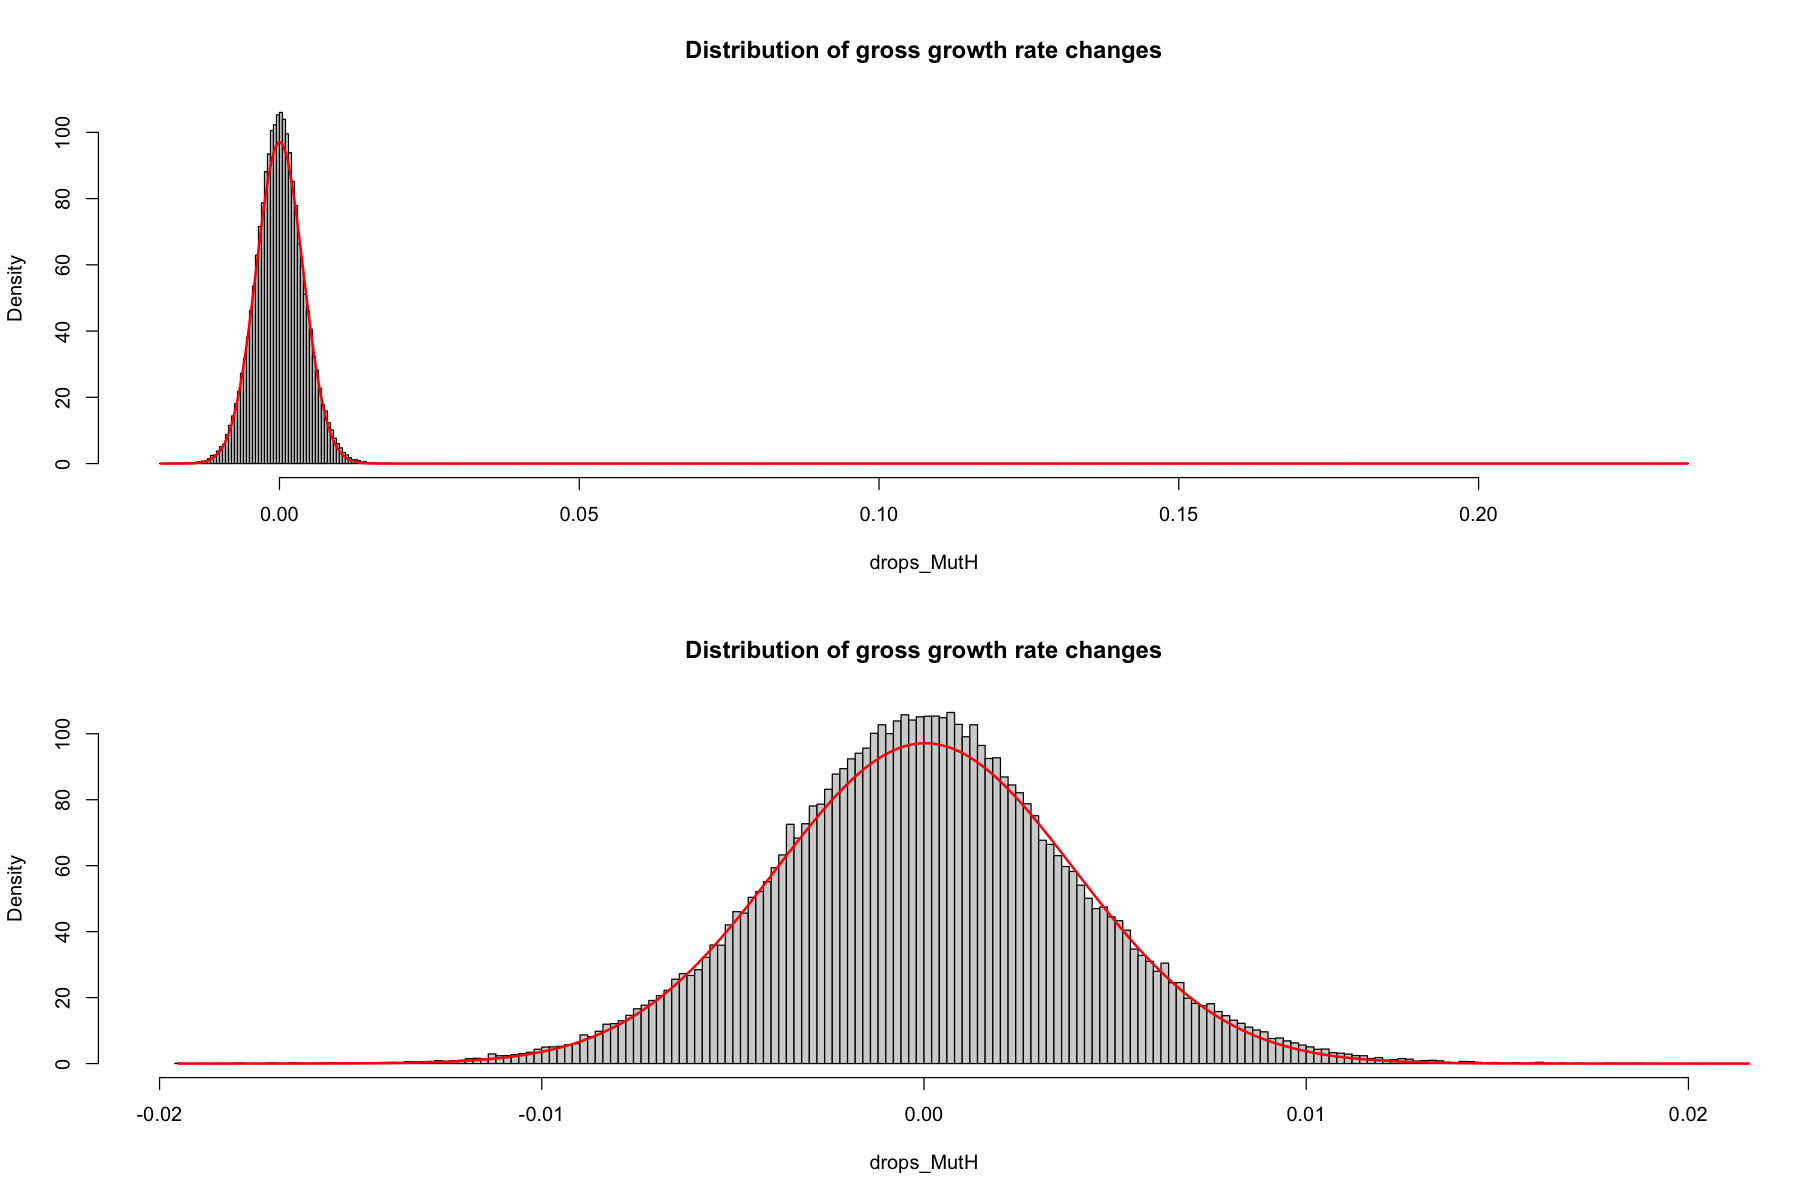

In [4]:
options(repr.plot.width = 15, repr.plot.height = 10)

drops_MutH <- -sapply(microMA_MutH_growthRates_RMdead_NAab, diff)
drops_MutH <- drops_MutH[drops_MutH != 0 & is.finite(drops_MutH)]

par(mfrow=c(2,1))
limit = 0.012
drops_MutH_dty <- hist(drops_MutH, breaks=500, probability = TRUE, main="Distribution of gross growth rate changes")
drops_MutH_norm_dty <- dnorm(drops_MutH_dty$mids, mean(drops_MutH[abs(drops_MutH)<limit]), sd(drops_MutH[abs(drops_MutH)<limit]))
lines(drops_MutH_dty$mids, drops_MutH_norm_dty*0.95, col = "red", lwd=2)

drops_MutH_dty2 <- hist(drops_MutH, breaks=1000, probability = TRUE, xlim=c(-0.02,0.02), main="Distribution of gross growth rate changes")
drops_MutH_norm_dty2 <- dnorm(drops_MutH_dty2$mids, mean(drops_MutH[abs(drops_MutH)<limit]), sd(drops_MutH[abs(drops_MutH)<limit]))
lines(drops_MutH_dty2$mids, drops_MutH_norm_dty2*0.95, col = "red", lwd=2)

# test de gaussianité :
drops_MutH_sd = sd(drops_MutH,na.rm=TRUE)
drops_MutH_mean = mean(drops_MutH,na.rm=TRUE)
drops_MutH_norm = (drops_MutH-drops_MutH_mean)/drops_MutH_sd

shapiro.test(drops_MutH_norm[1:5000])

$\to$ Cette répartition des chutes de taux de croissance bruts ne suit pas une distribution normale

# Sauts relatifs : (W-W')/W

## WT

In [5]:
W <- microMA_WT_growthRates_RMdead_NAab[1:200,]

reldrops_WT <- -sapply(W, diff)/W[-dim(W)[1],]
reldrops_WT <- reldrops_WT[reldrops_WT != 0]    # remove constant growth rates
reldrops_WT <- reldrops_WT[is.finite(reldrops_WT)]    # remove reborn dead cells (division by 0)

length(reldrops_WT)
summary(reldrops_WT)

[1] 25503

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-4.852866 -0.132656  0.001994 -0.019173  0.119886  0.803938 

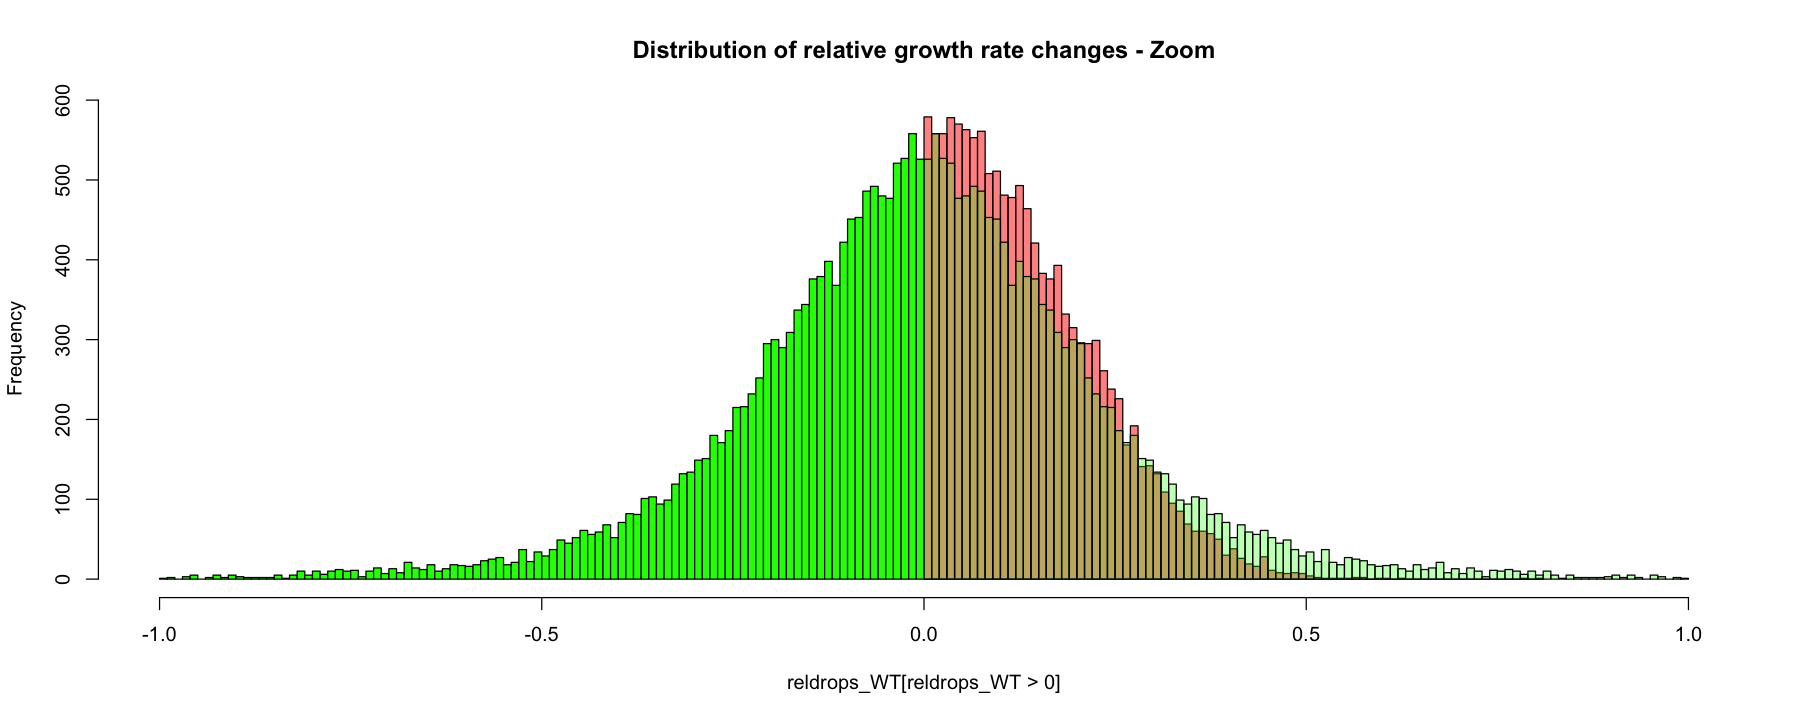

In [6]:
options(repr.plot.width = 15, repr.plot.height = 6)
hist(reldrops_WT[reldrops_WT > 0], breaks=100, xlim=c(-1, 1), col=alpha("red", 0.5), main="Distribution of relative growth rate changes - Zoom")
hist(reldrops_WT[reldrops_WT < 0 & reldrops_WT > -1], breaks=100, xlim=c(-1, 1), col="green", add=T)
hist(-reldrops_WT[reldrops_WT < 0 & reldrops_WT > -1], breaks=100, xlim=c(-1, 1), col=alpha("green", 0.3), add=T)

## MutH

In [7]:
W <- microMA_MutH_growthRates_RMdead_NAab

reldrops_MutH <- -sapply(W, diff)/W[-dim(W)[1],]
reldrops_MutH <- reldrops_MutH[reldrops_MutH != 0]    # remove constant growth rates
reldrops_MutH <- reldrops_MutH[is.finite(reldrops_MutH)]    # remove reborn dead cells (division by 0)

length(reldrops_MutH)
summary(reldrops_MutH)

[1] 90971

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-4.966772 -0.094758  0.000229 -0.008814  0.087067  0.857604 

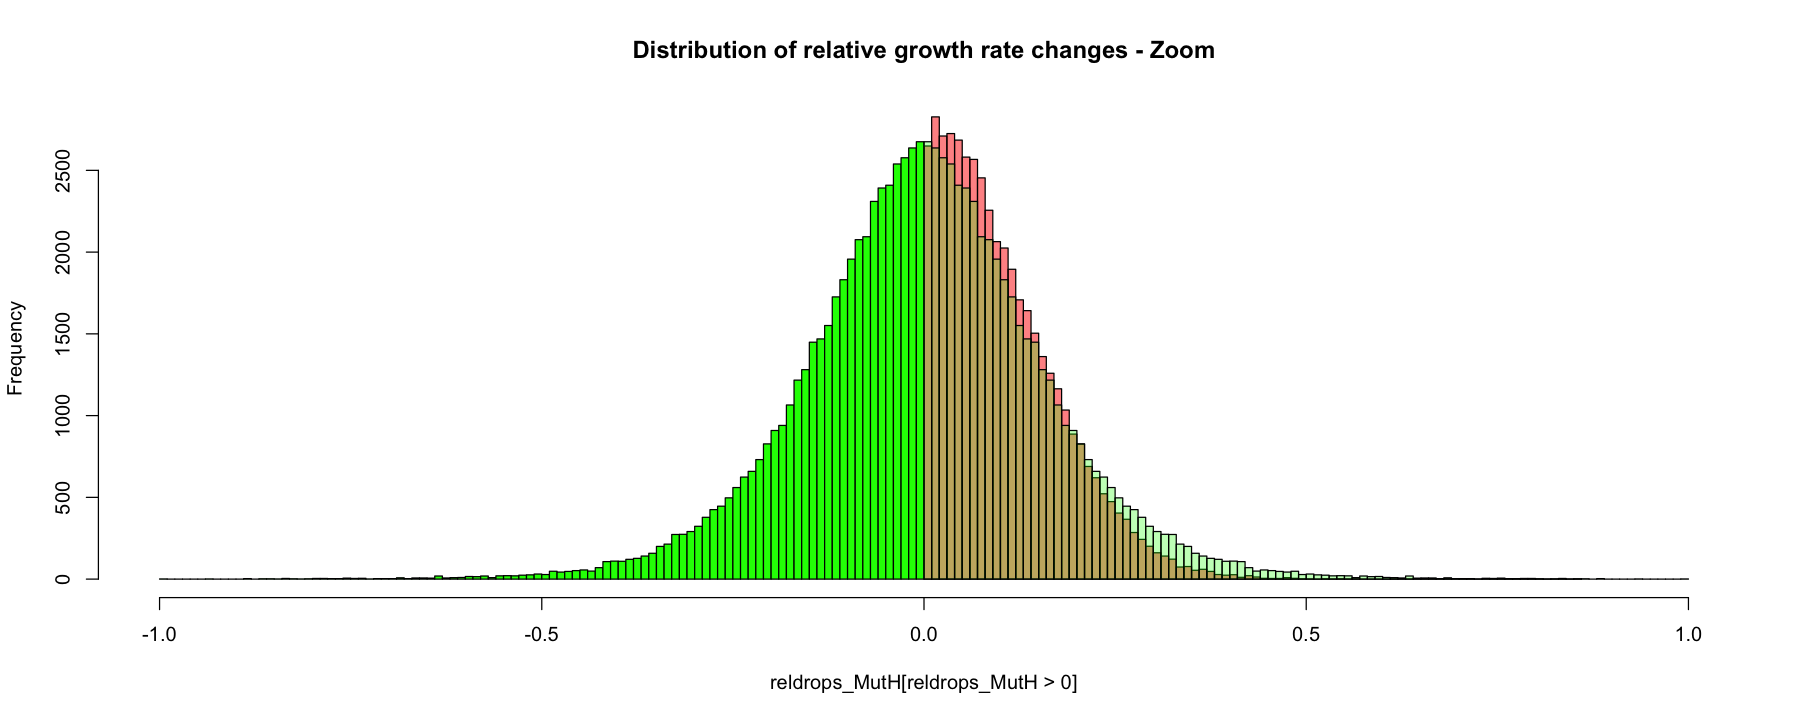

In [8]:
options(repr.plot.width = 15, repr.plot.height = 6)
hist(reldrops_MutH[reldrops_MutH > 0], breaks=100, xlim=c(-1, 1), col=alpha("red", 0.5), main="Distribution of relative growth rate changes - Zoom")
hist(reldrops_MutH[reldrops_MutH < 0 & reldrops_MutH > -1], breaks=100, xlim=c(-1, 1), col="green", add=T)
hist(-reldrops_MutH[reldrops_MutH < 0 & reldrops_MutH > -1], breaks=100, xlim=c(-1, 1), col=alpha("green", 0.3), add=T)

## MutT

In [9]:
W <- microMA_MutT_growthRates_RMdead_NAab

reldrops_MutT <- -sapply(W, diff)/W[-dim(W)[1],]
reldrops_MutT <- reldrops_MutT[reldrops_MutT != 0]    # remove constant growth rates
reldrops_MutT <- reldrops_MutT[is.finite(reldrops_MutT)]    # remove reborn dead cells (division by 0)

length(reldrops_MutT)
summary(reldrops_MutT)

[1] 99351

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-3.501623 -0.095280 -0.000924 -0.009656  0.086836  0.884066 

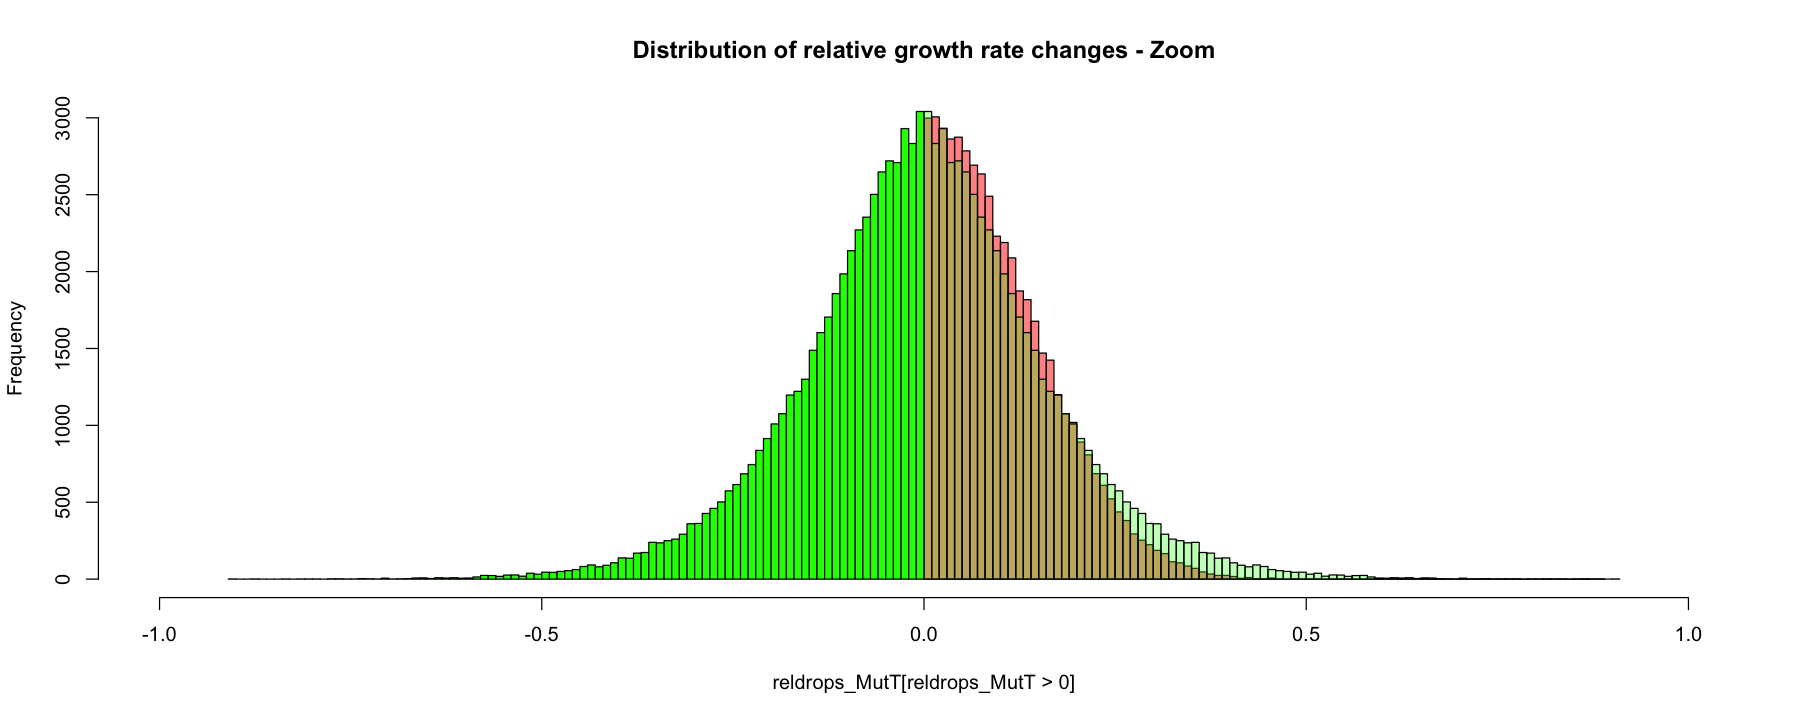

In [10]:
options(repr.plot.width = 15, repr.plot.height = 6)
hist(reldrops_MutT[reldrops_MutT > 0], breaks=100, xlim=c(-1, 1), col=alpha("red", 0.5), main="Distribution of relative growth rate changes - Zoom")
hist(reldrops_MutT[reldrops_MutT < 0 & reldrops_MutT > -1], breaks=100, xlim=c(-1, 1), col="green", add=T)
hist(-reldrops_MutT[reldrops_MutT < 0 & reldrops_MutT > -1], breaks=100, xlim=c(-1, 1), col=alpha("green", 0.3), add=T)

## MF1

In [11]:
W <- microMA_MF1_growthRates_RMdead_NAab

reldrops_MF1 <- -sapply(W, diff)/W[-dim(W)[1],]
reldrops_MF1 <- reldrops_MF1[reldrops_MF1 != 0]    # remove constant growth rates
reldrops_MF1 <- reldrops_MF1[is.finite(reldrops_MF1)]    # remove reborn dead cells (division by 0)

length(reldrops_MF1)
summary(reldrops_MF1)

[1] 12891

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-5.047718 -0.077832  0.007843 -0.002095  0.085455  1.000000 

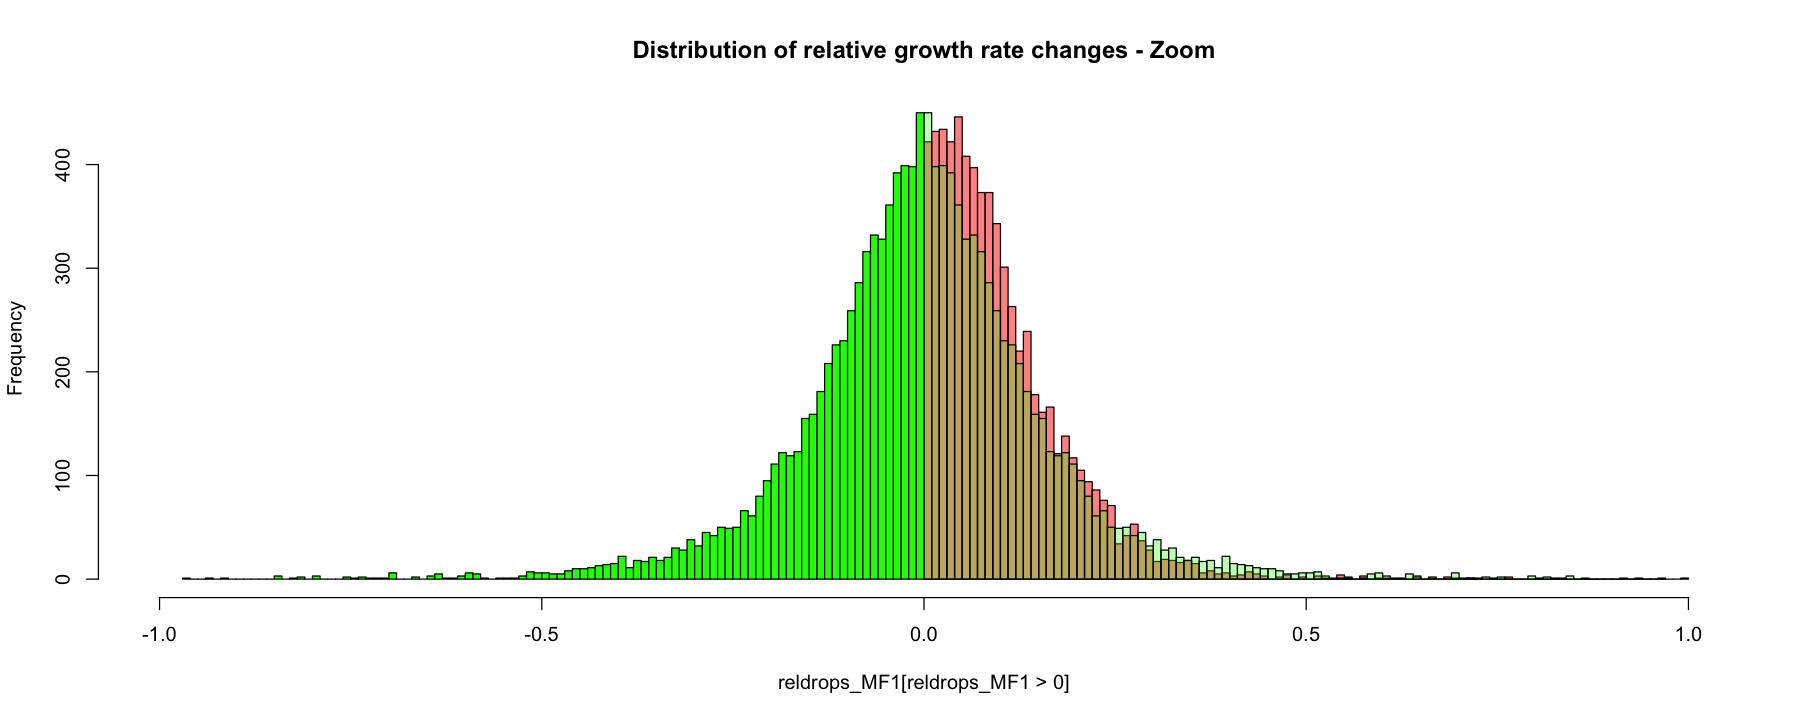

In [12]:
options(repr.plot.width = 15, repr.plot.height = 6)
hist(reldrops_MF1[reldrops_MF1 > 0], breaks=100, xlim=c(-1, 1), col=alpha("red", 0.5), main="Distribution of relative growth rate changes - Zoom")
hist(reldrops_MF1[reldrops_MF1 < 0 & reldrops_MF1 > -1], breaks=100, xlim=c(-1, 1), col="green", add=T)
hist(-reldrops_MF1[reldrops_MF1 < 0 & reldrops_MF1 > -1], breaks=100, xlim=c(-1, 1), col=alpha("green", 0.3), add=T)

## WT + MutH + MutT + MF1

Comparons ces différentes distributions :

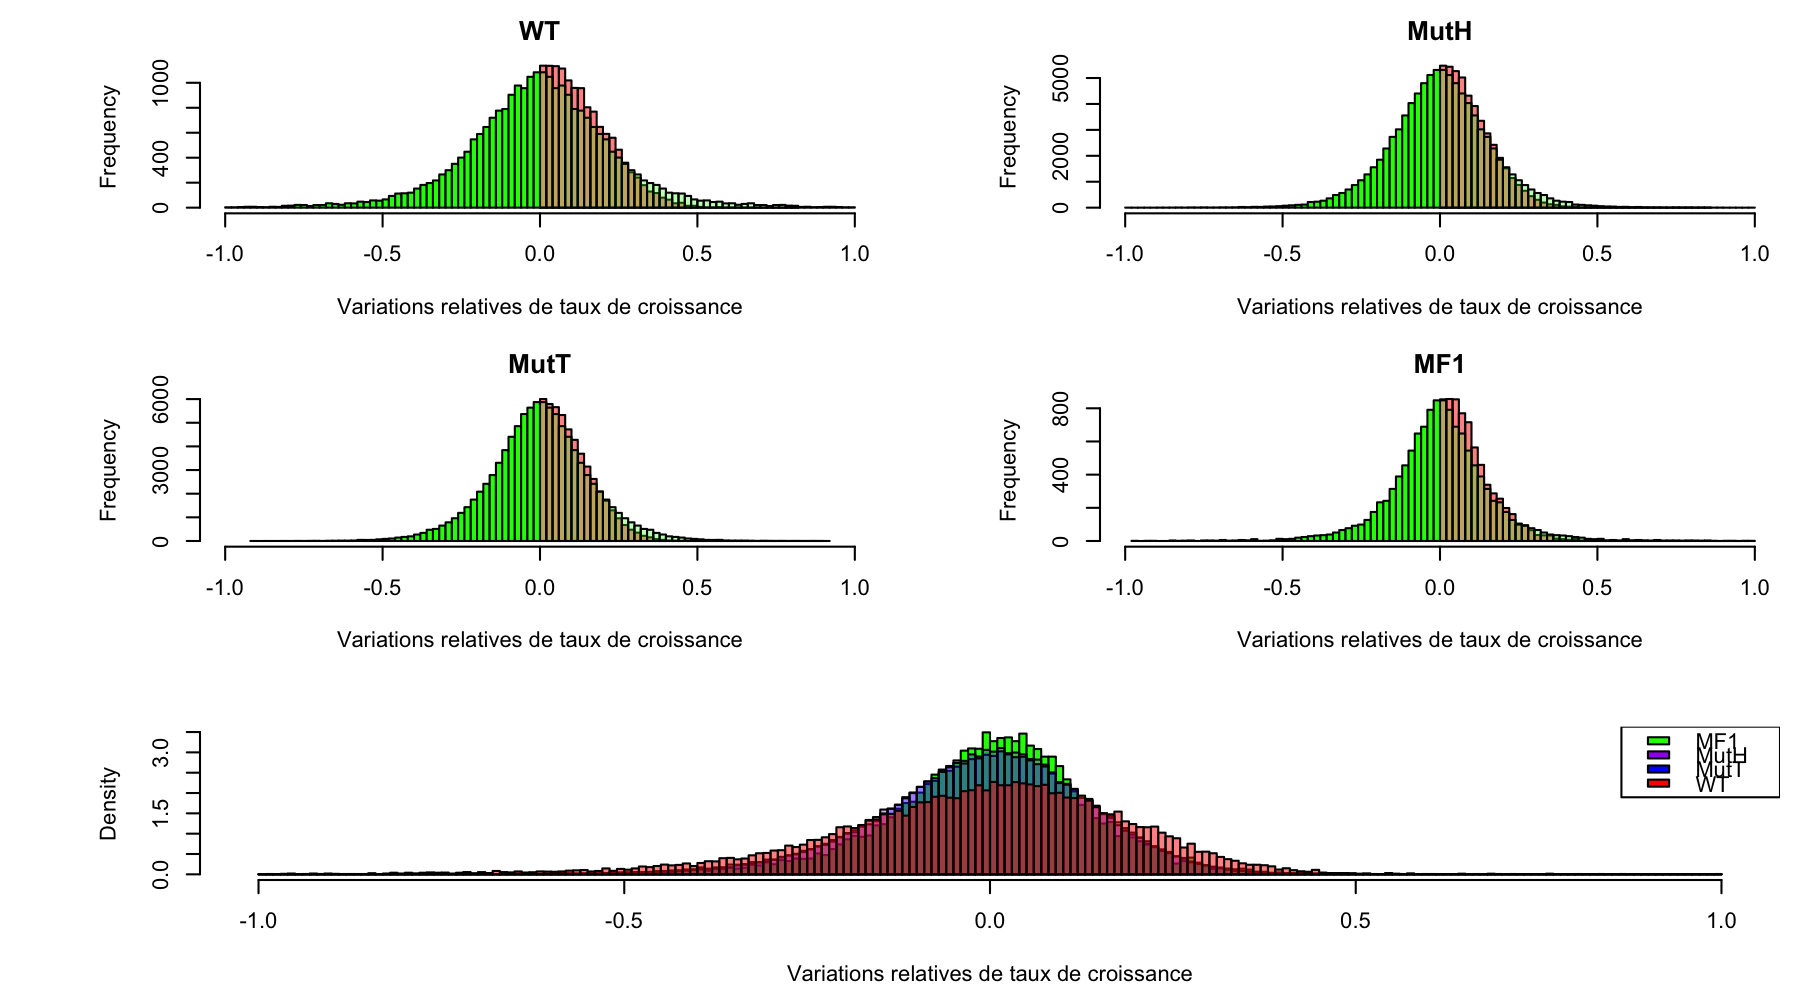

In [41]:
#png("Img/Variations_relatives_GR.png", width = 1600, height = 800, res = 150); par(cex=2)

options(repr.plot.width = 9, repr.plot.height = 5, repr.plot.res = 200)
layout(matrix(c(1,2,3,4,5,5), nrow = 3, ncol = 2, byrow = TRUE))
par(mai = c(0.6, 1, 0.3, 0.1))

hist(reldrops_WT[reldrops_WT > 0], breaks=50, xlim=c(-1, 1), col=alpha("red", 0.5), main="WT", xlab="Variations relatives de taux de croissance")
hist(reldrops_WT[reldrops_WT < 0 & reldrops_WT > -1], breaks=50, xlim=c(-1, 1), col="green", add=T)
hist(-reldrops_WT[reldrops_WT < 0 & reldrops_WT > -1], breaks=50, xlim=c(-1, 1), col=alpha("green", 0.3), add=T)

hist(reldrops_MutH[reldrops_MutH > 0], breaks=50, xlim=c(-1, 1), col=alpha("red", 0.5), main="MutH", xlab="Variations relatives de taux de croissance")
hist(reldrops_MutH[reldrops_MutH < 0 & reldrops_MutH > -1], breaks=50, xlim=c(-1, 1), col="green", add=T)
hist(-reldrops_MutH[reldrops_MutH < 0 & reldrops_MutH > -1], breaks=50, xlim=c(-1, 1), col=alpha("green", 0.3), add=T)

hist(reldrops_MutT[reldrops_MutT > 0], breaks=50, xlim=c(-1, 1), col=alpha("red", 0.5), main="MutT", xlab="Variations relatives de taux de croissance")
hist(reldrops_MutT[reldrops_MutT < 0 & reldrops_MutT > -1], breaks=50, xlim=c(-1, 1), col="green", add=T)
hist(-reldrops_MutT[reldrops_MutT < 0 & reldrops_MutT > -1], breaks=50, xlim=c(-1, 1), col=alpha("green", 0.3), add=T)

hist(reldrops_MF1[reldrops_MF1 > 0], breaks=50, xlim=c(-1, 1), col=alpha("red", 0.5), main="MF1", xlab="Variations relatives de taux de croissance")
hist(reldrops_MF1[reldrops_MF1 < 0 & reldrops_MF1 > -1], breaks=50, xlim=c(-1, 1), col="green", add=T)
hist(-reldrops_MF1[reldrops_MF1 < 0 & reldrops_MF1 > -1], breaks=50, xlim=c(-1, 1), col=alpha("green", 0.3), add=T)

breaks <- seq(-1, 1, length.out=201)

reldrops_MF1_dty <- hist(reldrops_MF1[reldrops_MF1>-1], breaks=breaks, col="green", probability = TRUE, main="", xlab="Variations relatives de taux de croissance")
reldrops_MutH_dty <- hist(reldrops_MutH[reldrops_MutH>-1], breaks=breaks, col=alpha("purple", 0.3), probability = TRUE, add=TRUE)
reldrops_MutT_dty <- hist(reldrops_MutT[reldrops_MutT>-1], breaks=breaks, col=alpha("blue", 0.3), probability = TRUE, add=TRUE)
reldrops_WT_dty <- hist(reldrops_WT[reldrops_WT>-1], breaks=breaks, col=alpha("red", 0.5), probability = TRUE, add=TRUE)

legend("topright", c("MF1", "MutH", "MutT", "WT"), fill=c("green", "purple", "blue", "red"))

#dev.off()

$\to$ Ces distributions de variations relatives de taux de croissance ne sont pas non plus normales, ni même symétrique si on superpose les 2 moitiés (verte et rouge)

$\to$ Plus le taux de mutation est faible (WT $<$ MutH $\simeq$ MutT $<$ WT) plus la distribution des sauts relatifs de croissance est étalée. La part du bruit devient plus importante que celle du signal.

### Évolution des effets sur la fitness, pour des taux de mutation croissants

Notons $W_\varepsilon$ le taux de croissance mesuré et $W$ le taux de croissance réel au temps $t$. L'article montre la pertinence de se baser sur une hypothèse de bruit multiplicatif : on suppose que $W_\varepsilon=W(1+\varepsilon)$ où les $\varepsilon$, $i\in\mathbb N$ sont des variables aléatoires indépendantes, identiquement distribuées, et indépendantes des $W$.

On peut exprimer les effets relatifs de la fitness bruités, avec $W_\varepsilon'$ la mesure de fitness au temps suivant :

$$s_\varepsilon=\frac{W_\varepsilon - W_\varepsilon'}{W_\varepsilon} 
= \frac{W(1+\varepsilon) - W'(1+\varepsilon')}{W(1+\varepsilon)}
= 1 - \frac{W'}{W}\frac{1+\varepsilon'}{1+\varepsilon}
\sim 1 - \frac{W'}{W}(1+\varepsilon'-\varepsilon)
= 1-(1+ \varepsilon'-\varepsilon)\prod_{i=0}^{N_{t'-t}}(1-s_i)$$

   - S'il n'y a pas de mutation entre les 2 mesures ($N_{t'-t}=0$, $s_0=0$) : $s_\varepsilon = \varepsilon'-\varepsilon = \Delta\varepsilon$

   - S'il y a eu une mutation ($N_{t'-t}=1$) : $s_\varepsilon = s_1(1+\Delta\varepsilon)$

Plus on augmente le taux de mutation $\lambda$, plus on aura en moyenne de mutations entre 2 mesures, alors que le bruit reste le même.

$$\bar s_\varepsilon \sim 1- (1-\bar s)^{\lambda\Delta t} (1 + \Delta\varepsilon)$$

$$\log(1-\bar s_\varepsilon) \sim \lambda\Delta t \log(1-\bar s) + \log(1 + \Delta\varepsilon)$$

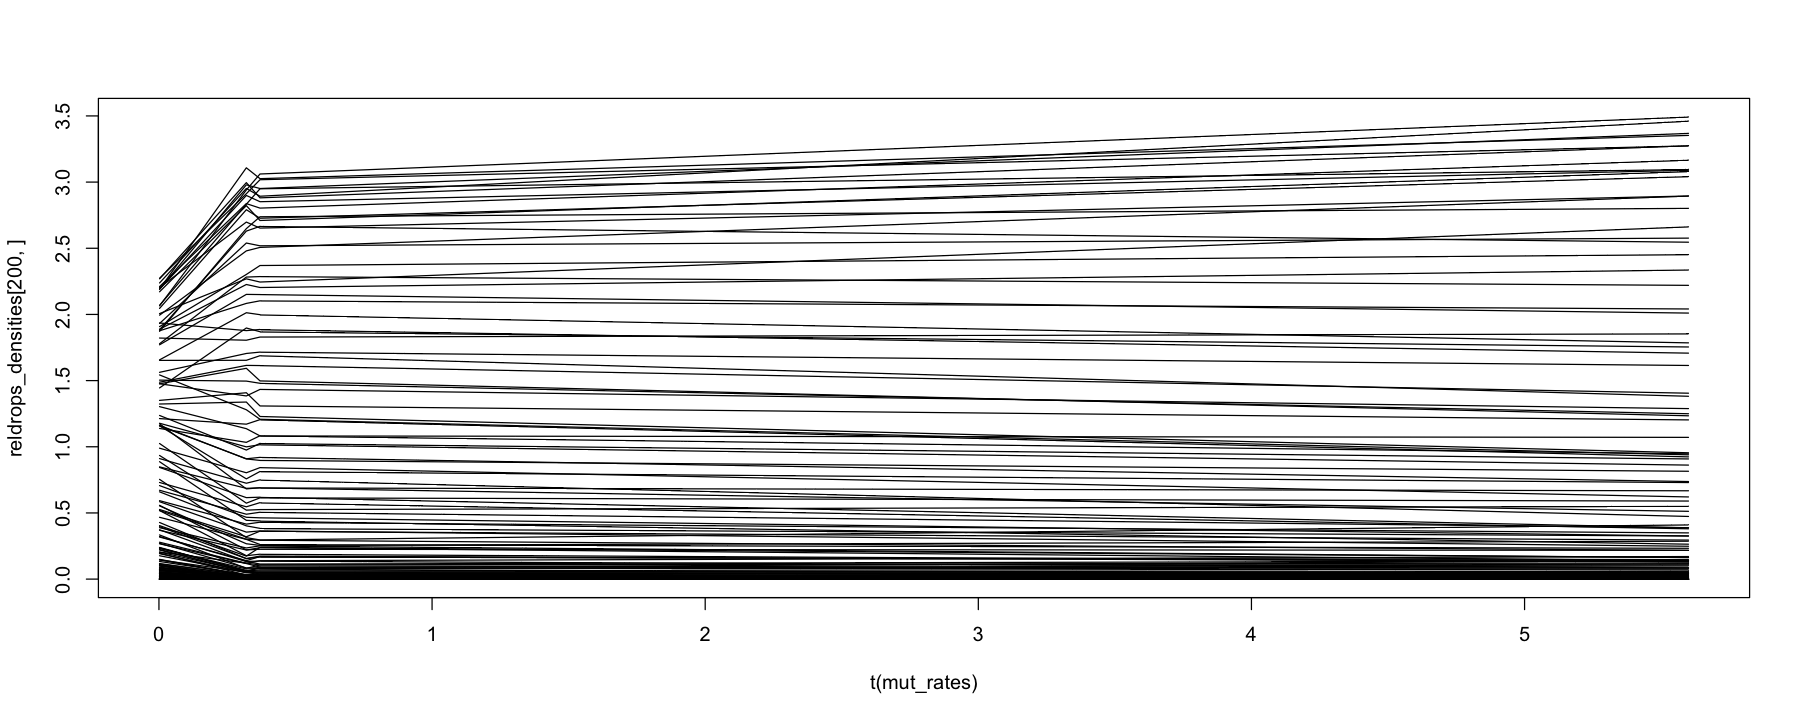

In [174]:
options(repr.plot.width = 15, repr.plot.height = 6)
reldrops_densities <- data.frame(WT = reldrops_WT_dty$density,
                                 MutH = reldrops_MutH_dty$density,
                                 MutT = reldrops_MutT_dty$density,
                                 MF1 = reldrops_MF1_dty$density)
mut_rates <- data.frame(WT = 0.002239,
                        MutH = 0.32,
                        MutT = 0.37,
                        MF1 = 5.6)

plot(t(mut_rates), reldrops_densities[200,], type="l", col="red", ylim = c(min(reldrops_densities), max(reldrops_densities)))
for (i in 1:199) {
    lines(t(mut_rates), reldrops_densities[i,])
}

Modèle linéaire simple :

$$Y = \alpha + \beta X$$

$$\beta = \frac{\sum(x_i-\bar x)(y_i-\bar y)}{\sum(x_i-\bar x)^2} = \frac{\text{Cov}(X,Y)}{\text{Var}(X)}$$

In [177]:
CovXY = apply(X = reldrops_densities, MARGIN = 1, FUN = cov, y = as.numeric(mut_rates))
VarX = var(as.numeric(mut_rates))
beta = CovXY / VarX

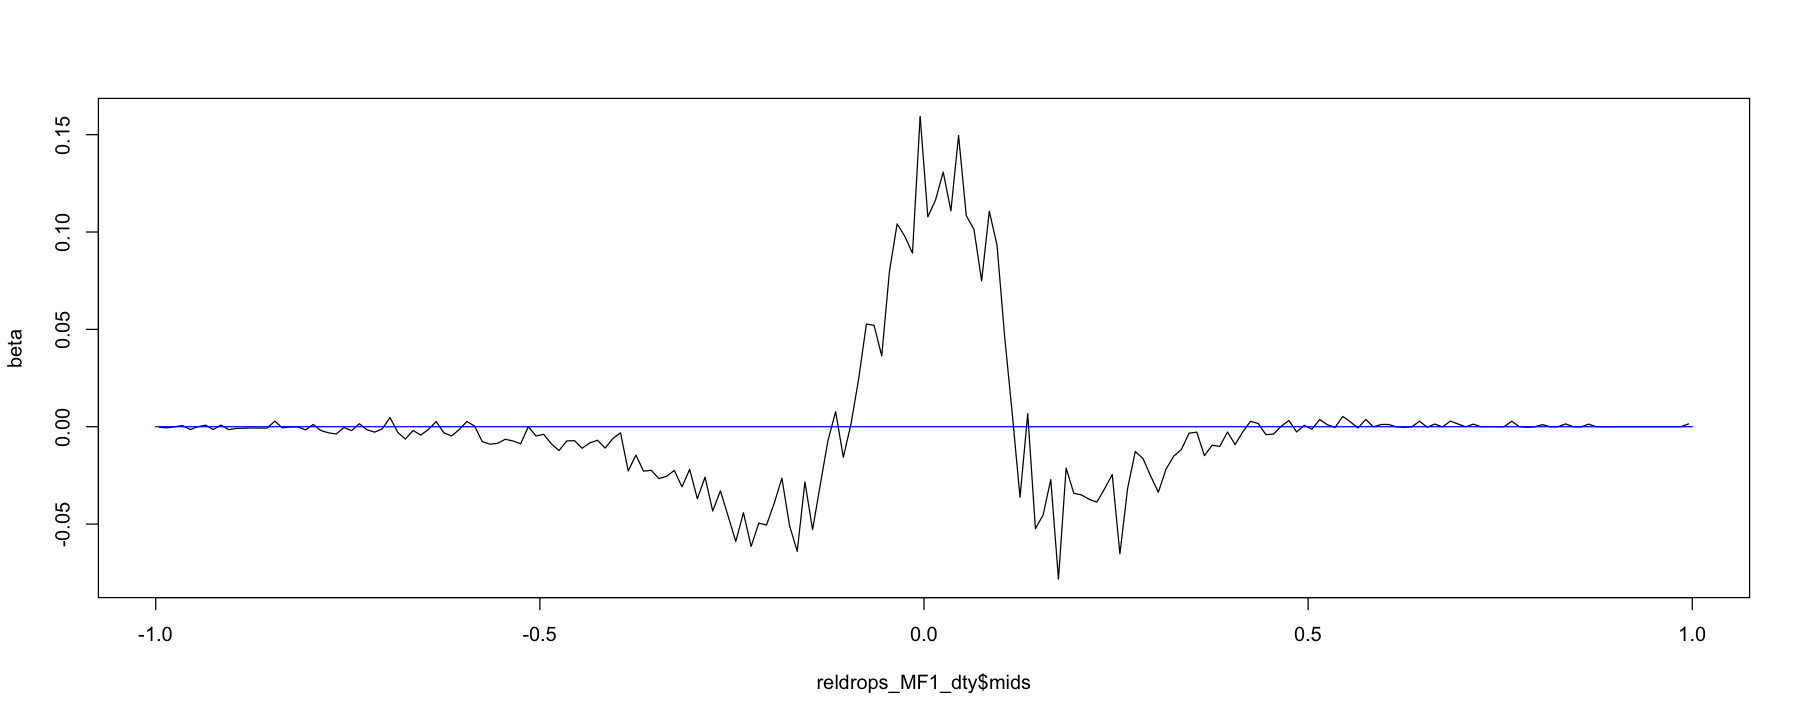

In [178]:
options(repr.plot.width = 15, repr.plot.height = 6)
plot(x = reldrops_MF1_dty$mids,
     y = beta,
     type = "l")
lines(c(-1,1), c(0,0), col="blue")

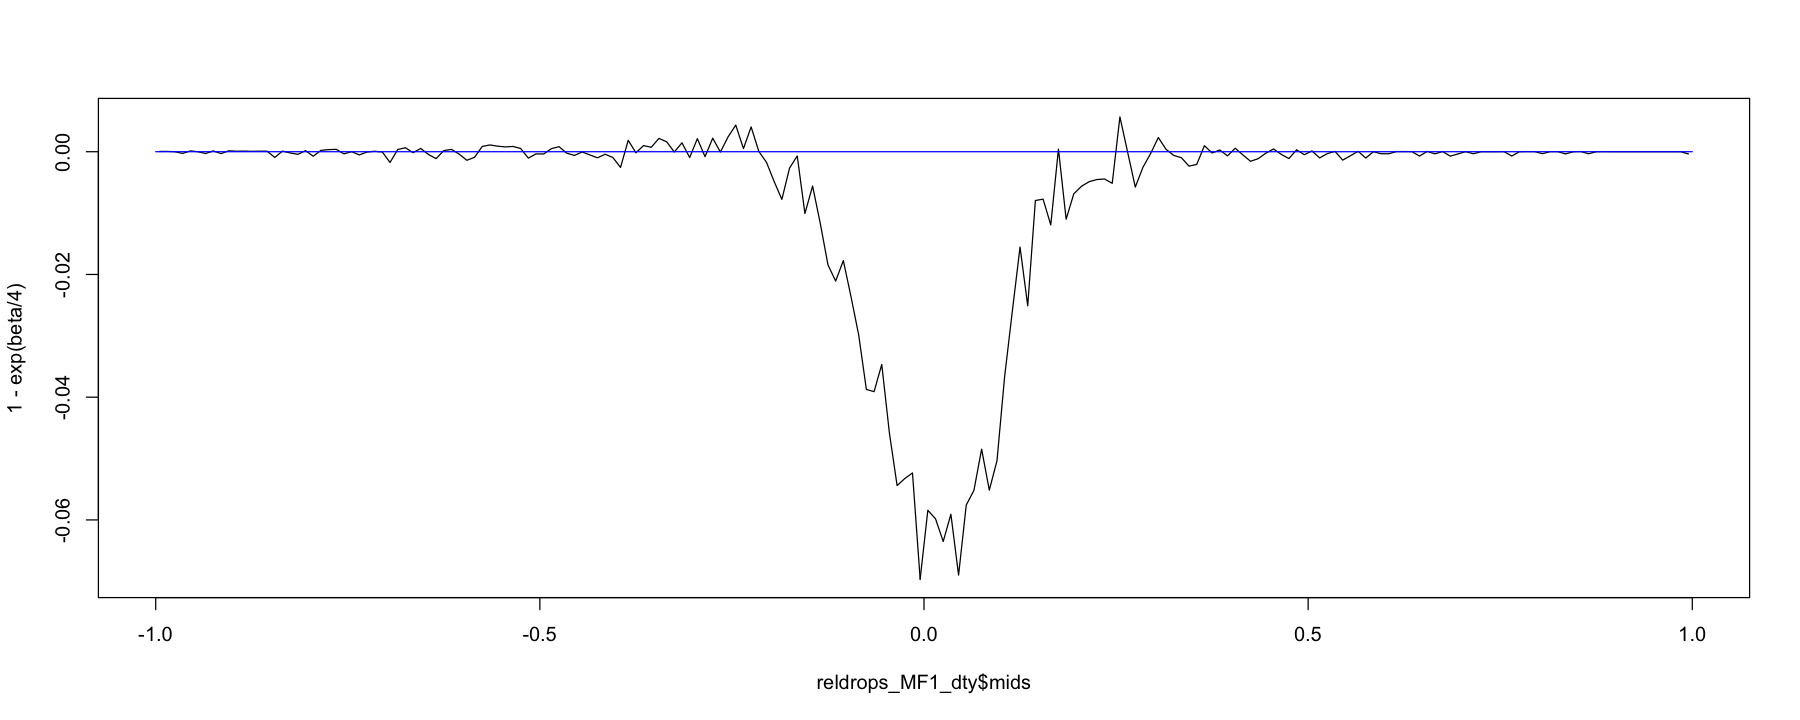

In [170]:
options(repr.plot.width = 15, repr.plot.height = 6)
plot(x = reldrops_MF1_dty$mids,
     y = 1-exp(beta/4),
     type = "l")
lines(c(-1,1), c(0,0), col="blue")

$\to$ La redistribution de la masse de la distribution (i.e. la réduction du bruit), associée à l'augmentation du nombre de mutations, donne des pentes négatives pour des sauts de fitness intermédiaires. Essayons de le corrriger - c'est-à-dire enlever seulement une fraction de la distribution de WT - en se calibrant sur la partie où $s<-0.5$ (forte augmentation du taux de croissance, en supposant des mutation aussi avantageuses négligeables).

### Supprimer une fraction de la distribution WT: calibration sur les sauts avantageux

Voyons ce que cette approche donne pour MutH, MutT et MF1 à qui on retranche une fraction de WT :

[1] "Percentage of lethal mutations in MutH : 0"
[1] "Percentage of lethal mutations in MutT : 0"
[1] "Percentage of lethal mutations in MF1 : 0.01"


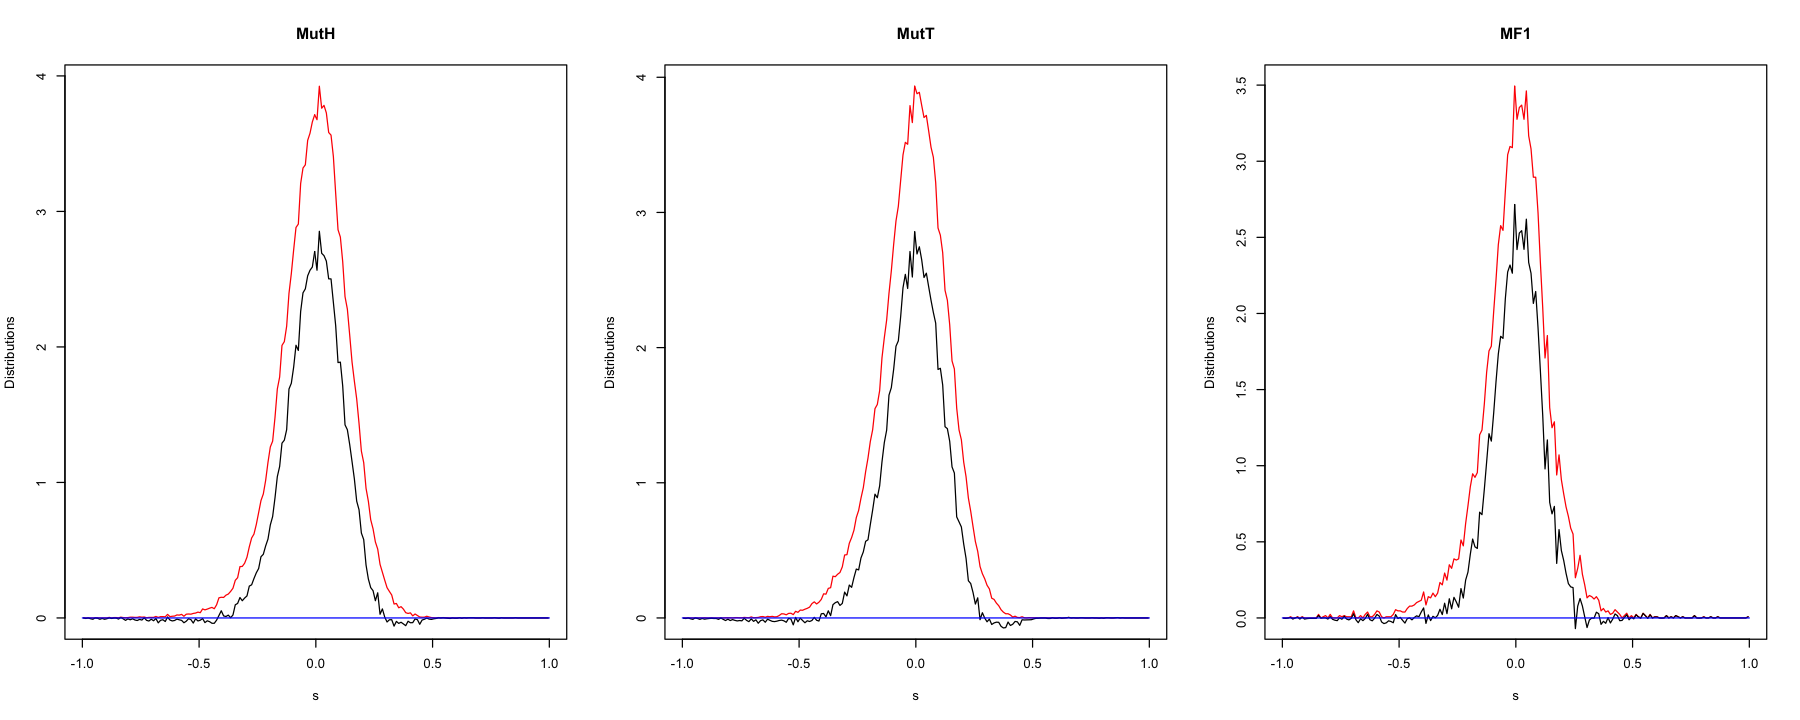

In [118]:
options(repr.plot.width = 15, repr.plot.height = 6)
par(mfrow=c(1,3))
for (i in 1:3){
    X = rbind(reldrops_densities$MutH, reldrops_densities$MutT, reldrops_densities$MF1)[i,]
    DFE_XmWT <- X - mean(X[1:70])/mean(reldrops_densities$WT[1:70])*reldrops_densities$WT
    plot(x = reldrops_WT_dty$mids,
         y = X,
         type = "l", xlab="s", col="red", ylab="Distributions", main=c("MutH", "MutT", "MF1")[i])
    lines(x = reldrops_WT_dty$mids,
          y = DFE_XmWT)
    lines(c(-1,1), c(0,0), col="blue")
    print(paste("Percentage of lethal mutations in", c("MutH", "MutT", "MF1")[i], ":", round(DFE_XmWT[length(DFE_XmWT)]/sum(DFE_XmWT), 4)*100))
}

$\to$ D'après l'article on s'attend à obtenir 1% de mutations létales, ce qui montre que les reconstitutions de la DFE ci-dessus ne sont pas satisfaisantes. Et ce même pour des calibrations très différentes :

In [119]:
for (i in 1:3){
    print(c("MutH:", "MutT:", "MF1:")[i])
    print(t(data.frame(s=round(reldrops_WT_dty$mids[1:10*10], 1), prop_lethal_mut=sapply(1:10*10, function(n){
        X = rbind(reldrops_densities$MutH, reldrops_densities$MutT, reldrops_densities$MF1)[i,]
        DFE_XmWT <- X - mean(X[1:n])/mean(reldrops_densities$WT[1:n])*reldrops_densities$WT
        return(round(DFE_XmWT[length(DFE_XmWT)]/sum(DFE_XmWT), 4)*100)
    }))))}

[1] "MutH:"
                [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10]
s               -0.9 -0.8 -0.7 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1     0
prop_lethal_mut  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0
[1] "MutT:"
                [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10]
s               -0.9 -0.8 -0.7 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1     0
prop_lethal_mut  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0
[1] "MF1:"
                 [,1]  [,2]  [,3]  [,4]  [,5]  [,6]  [,7]  [,8]  [,9] [,10]
s               -0.90 -0.80 -0.70 -0.60 -0.50 -0.40 -0.30 -0.20 -0.10  0.00
prop_lethal_mut  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.02  0.19


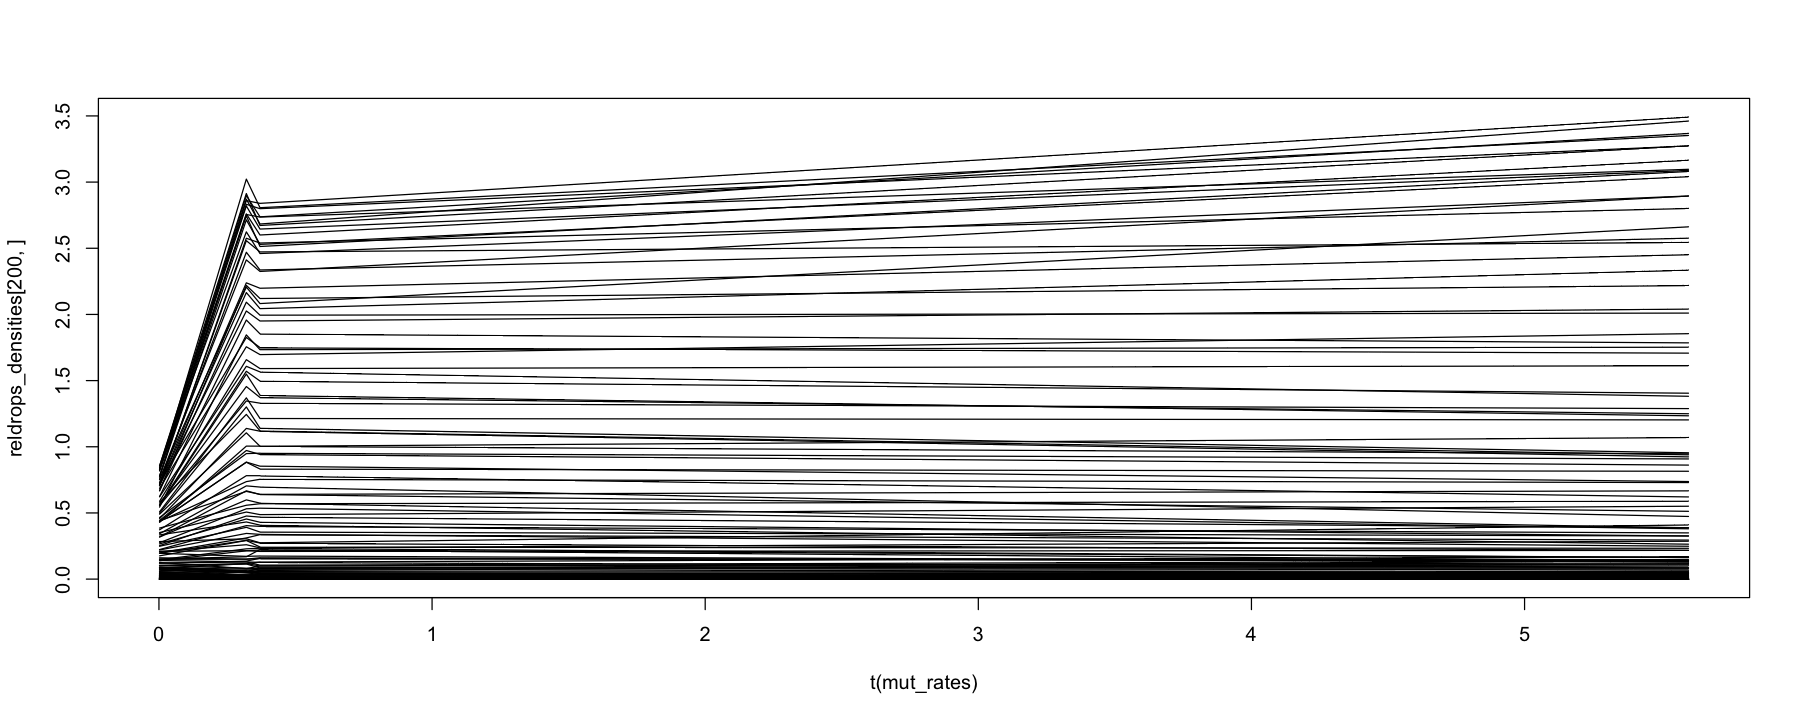

In [130]:
options(repr.plot.width = 15, repr.plot.height = 6)
reldrops_densities <- data.frame(WT = reldrops_WT_dty$density * mean(reldrops_MF1_dty$density[1:70])/mean(reldrops_WT_dty$density[1:70]),
                                 MutH = reldrops_MutH_dty$density * mean(reldrops_MF1_dty$density[1:70])/mean(reldrops_MutH_dty$density[1:70]),
                                 MutT = reldrops_MutT_dty$density * mean(reldrops_MF1_dty$density[1:70])/mean(reldrops_MutT_dty$density[1:70]),
                                 MF1 = reldrops_MF1_dty$density)
mut_rates <- data.frame(WT = 0.002239,
                        MutH = 0.32,
                        MutT = 0.37,
                        MF1 = 5.6)

plot(t(mut_rates), reldrops_densities[200,], type="l", col="red", ylim = c(min(reldrops_densities), max(reldrops_densities)))
for (i in 1:199) {
    lines(t(mut_rates), reldrops_densities[i,])
}

In [131]:
CovXY = apply(X = reldrops_densities, MARGIN = 1, FUN = cov, y = as.numeric(mut_rates))
VarX = var(as.numeric(mut_rates))
beta = CovXY / VarX

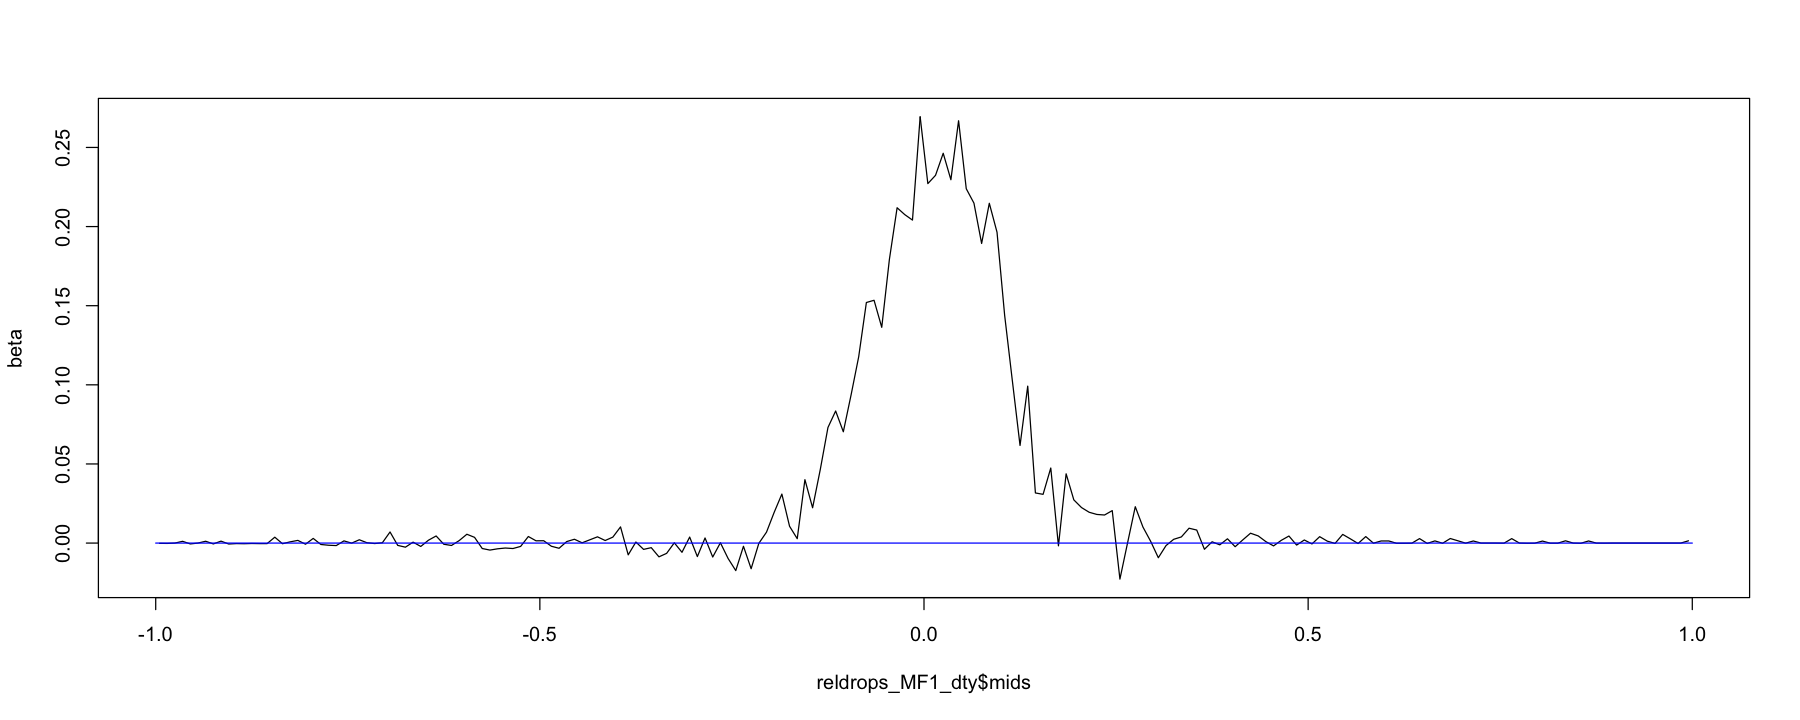

In [132]:
options(repr.plot.width = 15, repr.plot.height = 6)
plot(x = reldrops_MF1_dty$mids,
     y = beta,
     type = "l")
lines(c(-1,1), c(0,0), col="blue")

In [133]:
tail(beta, 1)/sum(beta)

[1] 0.0002838405

$\to$ La proportion de mutations létales est encore trop élevée.

In [134]:
library("moments")
S <- sample(x = reldrops_MF1_dty$mids, size = 10**6, prob = sapply(beta, max, 0), replace = T)
mean(S)
sd(S)/mean(S)
skewness(S)
kurtosis(S)

[1] 0.0169439

[1] 7.660624

[1] -0.5655176

[1] 16.2132

$\to$ Les moments ne correspondent pas non plus.

![](Img/DFE_characterization.png)

### Other failed attempts

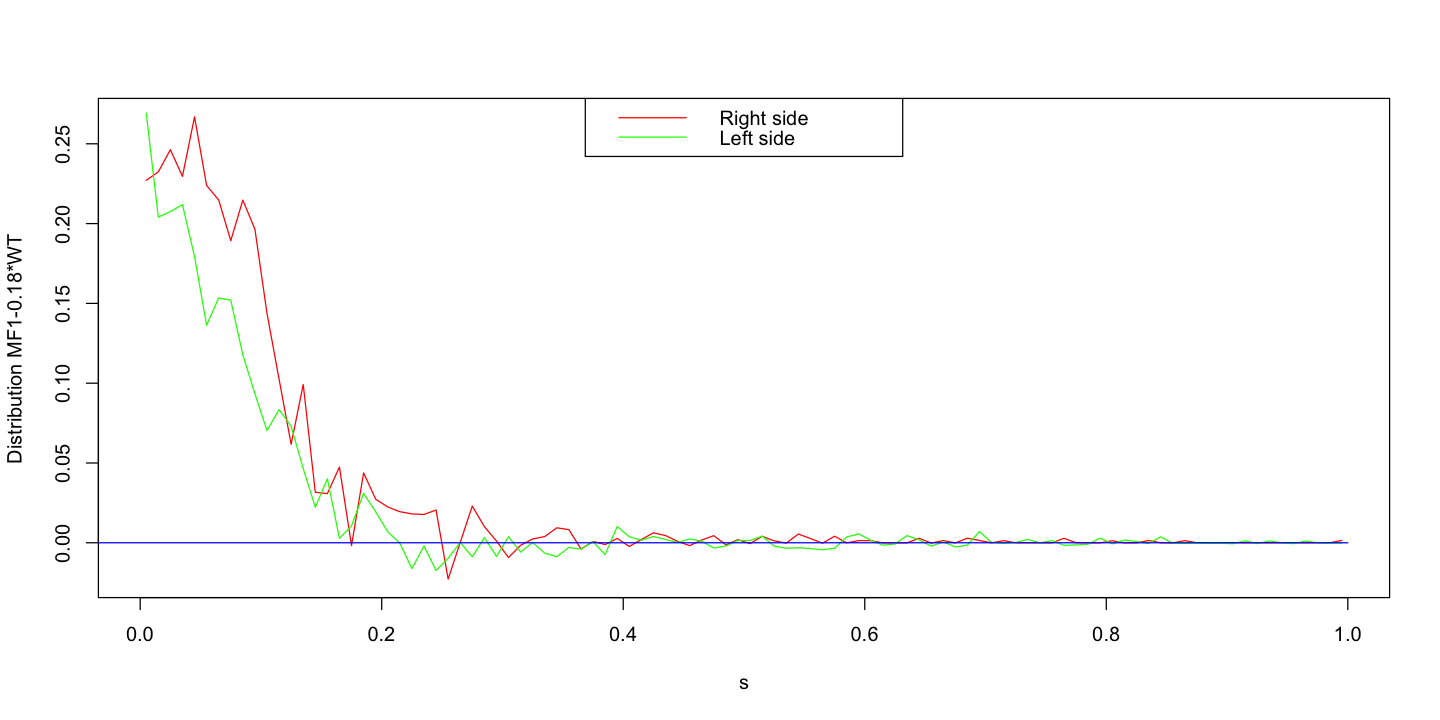

In [135]:
options(repr.plot.width = 12, repr.plot.height = 6)
plot(x = reldrops_MF1_dty$mids[reldrops_MF1_dty$mids>0],
     y = beta[reldrops_MF1_dty$mids>0],
     type = "l", col="red", xlab="s", ylab="Distribution MF1-0.18*WT")
lines(x = reldrops_MF1_dty$mids[reldrops_MF1_dty$mids>0],
      y = rev(beta[reldrops_MF1_dty$mids<0]),
      col="green")
legend("top", c("Right side", "Left side"), lty=1, col=c("red", "green"))
lines(c(-1,1), c(0,0), col="blue")

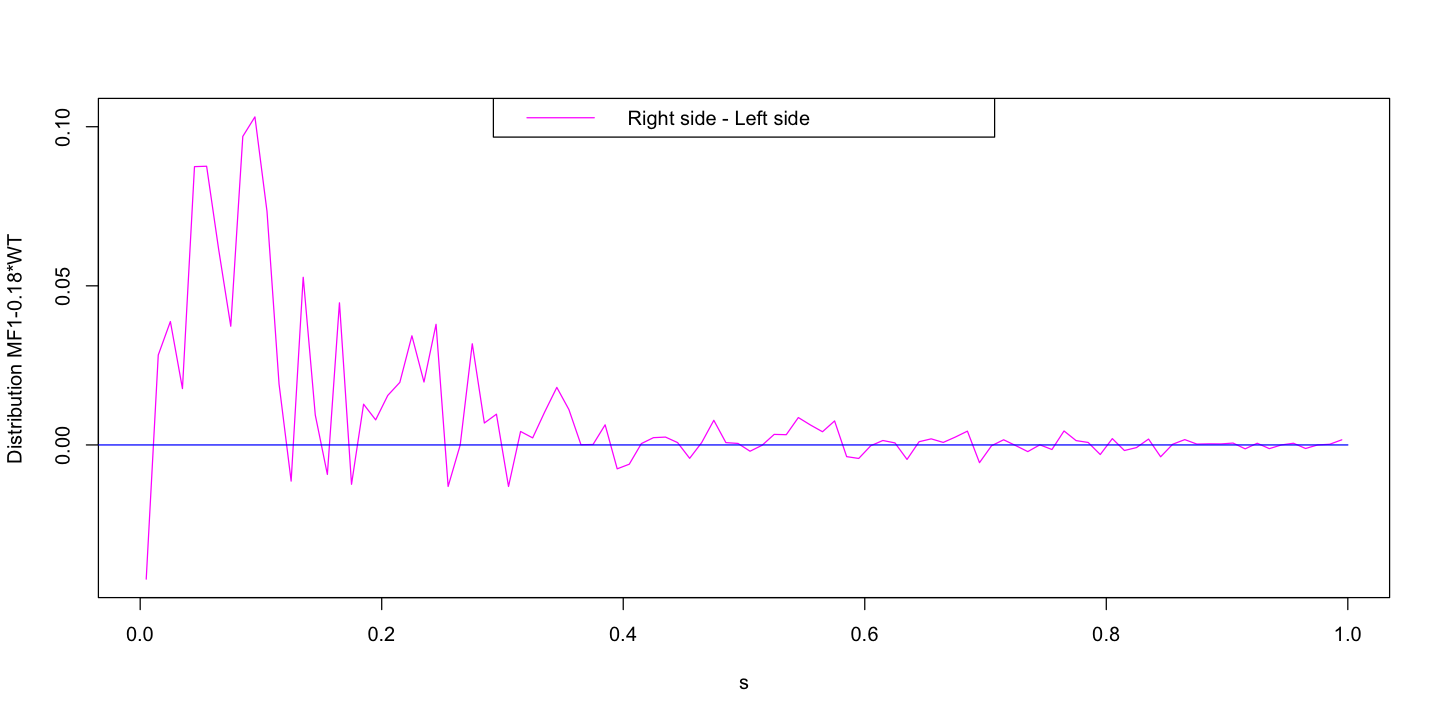

In [136]:
options(repr.plot.width = 12, repr.plot.height = 6)
plot(x = reldrops_MF1_dty$mids[reldrops_MF1_dty$mids>0],
     y = beta[reldrops_MF1_dty$mids>0] - rev(beta[reldrops_MF1_dty$mids<0]),
     type = "l", col="magenta", xlab="s", ylab="Distribution MF1-0.18*WT")
legend("top", c("Right side - Left side"), lty=1, col=c("magenta"))
lines(c(-1,1), c(0,0), col="blue")